In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
random_seed = 42

from models import LM, LMLoss
from data import LM_Dataset
from trainer_ml import LMTrainer
from utils import loaders_from_dataset, visualize_embeddings, save_model

In [3]:
dataset = LM_Dataset('datasets/open_subtitles_pl_georgia/datasetSentences.csv')
loaders = loaders_from_dataset(dataset, batch_size=32, val_perc_size=0.05)

In [4]:
%tensorboard --logdir=data

In [5]:
epochs = 500
model = LM(vocab_size=len(dataset.Ind2word), emb_dim=50, rnn=torch.nn.LSTM)
optim = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.001)
params_trainer = {
    'model': model,
    'loaders': loaders,
    'criterion': LMLoss(),
    'optim': optim,
    'val_step': 5,
    'scheduler': torch.optim.lr_scheduler.CosineAnnealingLR(optim, epochs),
    'verbose': False,
    'device': device,
#     'params_clearml': params_clearml,
    'is_tensorboard': True
}

trainer = LMTrainer(**params_trainer)

In [6]:
trainer.loop(0, epochs, exp_name='LSTM_typical_epsilon')

  0%|          | 0/500 [00:00<?, ?it/s]

VALIDATION OF EPOCH 4
Wyjściowe zdanie to  ::  <s> Rok temu na meczu softballu drużyna CBS miała czapki z napisem `` przynajmniej nie jesteśmy Daybreak '' .
Zaczątek zdania to   ::  <s> Rok temu na meczu softballu drużyna CBS miała czapki z napisem `` przynajmniej
Kontynuacja zdania to::  całkowitej oceny </s> . </s> </s> . </s>

Wyjściowe zdanie to  ::  <s> Ned Tebbets był tu dzisiaj , naprawiał toaletę i groził , że naprawi ciebie .
Zaczątek zdania to   ::  <s> Ned Tebbets był tu dzisiaj , naprawiał toaletę i groził ,
Kontynuacja zdania to::  że nie ma nic przeciwko dotykaniu dziwnych rzeczy

Wyjściowe zdanie to  ::  <s> Posłuchałem , jak mówił Pietrosowi , że chce za to wykupić ich wolność .
Zaczątek zdania to   ::  <s> Posłuchałem , jak mówił Pietrosowi , że chce za to
Kontynuacja zdania to::  , co jest w stanie poruszyc serca .

Wyjściowe zdanie to  ::  <s> Za co ? Rzekomo przejechałem na czerwonym świetle z prędkością 100 km/h .
Zaczątek zdania to   ::  <s> Za co ? Rzekomo przeje

Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


VALIDATION OF EPOCH 499
Wyjściowe zdanie to  ::  <s> - Tu chodzi o wszystkie światy . Olimp musiałby postawić się po jednej stronie .
Zaczątek zdania to   ::  <s> - Tu chodzi o wszystkie światy . Olimp musiałby postawić się
Kontynuacja zdania to::  tak trochę . </s> martwi , że tego

Wyjściowe zdanie to  ::  <s> `` że cwaniak taki jak ty jest za cwany aby dać sie japońcom ''
Zaczątek zdania to   ::  <s> `` że cwaniak taki jak ty jest za cwany aby
Kontynuacja zdania to::  nie jest się źli '' , ten którym

Wyjściowe zdanie to  ::  <s> Już raz prawie cię straciłam . Nie pozwolę , by to się powtórzyło .
Zaczątek zdania to   ::  <s> Już raz prawie cię straciłam . Nie pozwolę , by
Kontynuacja zdania to::  się sobie poradzić na siebie . </s> pracą

Wyjściowe zdanie to  ::  <s> Ale będę z tobą szczery . To co tam zobaczyłem , przeraziło mnie .
Zaczątek zdania to   ::  <s> Ale będę z tobą szczery . To co tam zobaczyłem
Kontynuacja zdania to::  . </s> tak na poważnie nie będę mnie

Wyjściowe zda

SVD done!


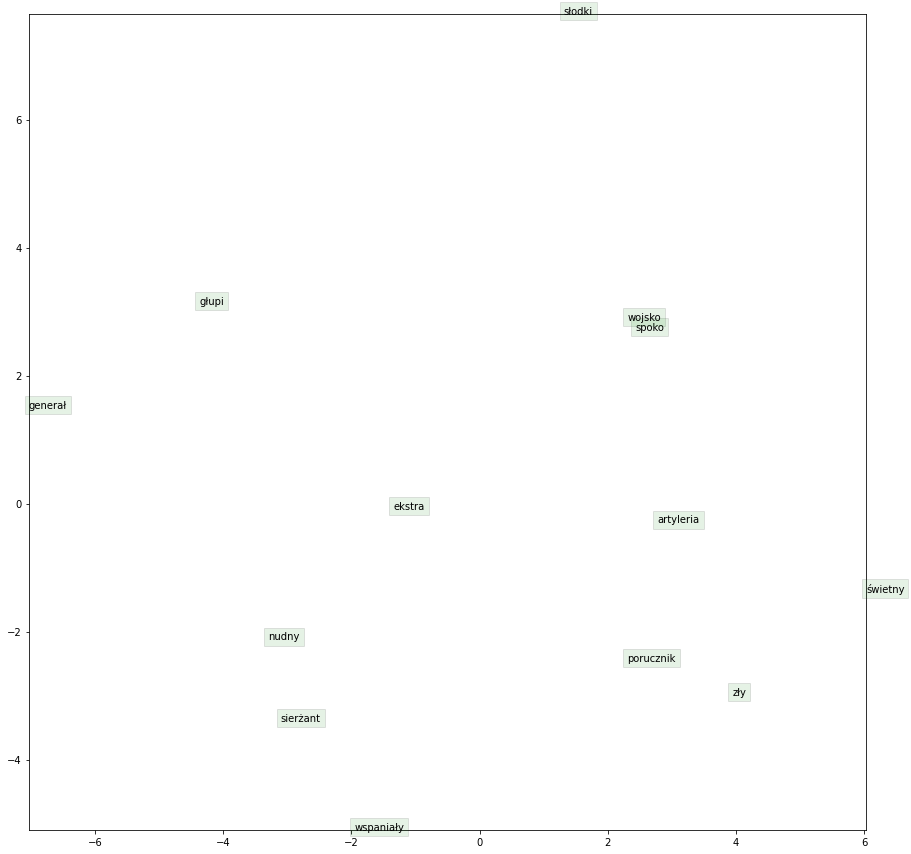

In [7]:
word2Ind = {word: i for i, word in dataset.Ind2word.items()}

chosen_words = [
    "świetny", "głupi", "wspaniały", "spoko", "ekstra",
    "słodki", "nudny",   "zły", 
    "artyleria", "generał", 'porucznik', "sierżant", "wojsko",
#     "dobrze"
] 
chosen_idxs = [word2Ind[word] for word in chosen_words]

visualize_embeddings(model.embs.weight.detach().cpu().numpy(), chosen_idxs, dataset.Ind2word)

## Length of sentence distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sent_len = np.array([len(sent) for sent in dataset.indexed_data])

In [ ]:
plt.hist(sent_len, bins=100);

In [ ]:
print(sent_len.mean(), sent_len.std(), sent_len.min(), sent_len.max())

Uwagi:
- Czy nie powinienem brac P(x_t|x_1, x_2,...,x_{t-1}) dopiero od pewnego t > 2? (t > 5)?
- Zbudować ewaluacje, 
- Poprawić trainera na guthubie (os.makedirs, .pth)

In [ ]:
from utils import load_model

In [ ]:
model = LM(vocab_size=len(dataset.Ind2word), emb_dim=50, rnn=torch.nn.LSTM)
load_model(model, 'data/LSTM/2022-04-01_00-20-06/checkpoints/_epoch_199.pth')